In [3]:
from dotenv import load_dotenv
load_dotenv()

import os

os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")
groq_model = os.getenv("GROQ_MODEL_NAME")

In [2]:
from langchain_core.messages import AIMessage,HumanMessage
from pprint import pprint

messages=[AIMessage(content=f"Please tell me how can I help",name="LLMModel")]
messages.append(HumanMessage(content=f"I want to learn coding",name="Krish"))
messages.append(AIMessage(content=f"Which programming language you want to learn",name="LLMModel"))
messages.append(HumanMessage(content=f"I want to learn python programming language",name="Krish"))

for message in messages:
    message.pretty_print()

================================== Ai Message ==================================
Name: LLMModel

Please tell me how can I help
================================ Human Message =================================
Name: Krish

I want to learn coding
================================== Ai Message ==================================
Name: LLMModel

Which programming language you want to learn
================================ Human Message =================================
Name: Krish

I want to learn python programming language


In [4]:
from langchain_groq import ChatGroq

llm=ChatGroq(model=groq_model)
result=llm.invoke(messages)

c:\Users\hites\OneDrive\Desktop\AI\agentic-rag\langgraph-basic\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
result.response_metadata

{'token_usage': {'completion_tokens': 1446,
  'prompt_tokens': 54,
  'total_tokens': 1500,
  'completion_time': 2.981721989,
  'prompt_time': 0.001952428,
  'queue_time': 0.82512069,
  'total_time': 2.983674417},
 'model_name': 'qwen/qwen3-32b',
 'system_fingerprint': 'fp_5cf921caa2',
 'service_tier': 'on_demand',
 'finish_reason': 'stop',
 'logprobs': None,
 'model_provider': 'groq'}

In [6]:
def add(a:int,b:int)-> int:
    """ Add a and b
    Args:
        a (int): first int
        b (int): second int

    Returns:
        int
    """
    return a+b

In [7]:
### Binding tool with llm

llm_with_tools=llm.bind_tools([add])
tool_call=llm_with_tools.invoke([HumanMessage(content=f"What is 2 plus 2",name="Hitesh")])

In [8]:
tool_call.tool_calls

[{'name': 'add',
  'args': {'a': 2, 'b': 2},
  'id': 'ng0a7rh0y',
  'type': 'tool_call'}]

In [9]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage

class State(TypedDict):
    message:list[AnyMessage]

In [10]:
from langgraph.graph.message import add_messages
from typing import Annotated

class State(TypedDict):
    messages:Annotated[list[AnyMessage],add_messages]

In [11]:
initial_messages=[AIMessage(content=f"Please tell me how can I help",name="LLMModel")]
initial_messages.append(HumanMessage(content=f"I want to learn coding",name="Krish"))

ai_message=AIMessage(content=f"Which programming language you want to learn",name="LLMModel")

In [12]:
### Reducers add_messages is to append instead of override
add_messages(initial_messages,ai_message)

[AIMessage(content='Please tell me how can I help', additional_kwargs={}, response_metadata={}, name='LLMModel', id='d34b6905-8eb2-4c27-b6bb-389dd5bcfd42'),
 HumanMessage(content='I want to learn coding', additional_kwargs={}, response_metadata={}, name='Krish', id='760e930f-ee89-4018-a1c2-f620c975759c'),
 AIMessage(content='Which programming language you want to learn', additional_kwargs={}, response_metadata={}, name='LLMModel', id='7e38cbab-c45e-4fa9-a279-79aa8630d3bc')]

In [13]:
## chatbot node functionality
def llm_tool(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

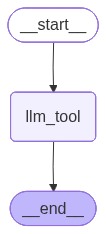

In [14]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
builder=StateGraph(State)

builder.add_node("llm_tool",llm_tool)

builder.add_edge(START,"llm_tool")
builder.add_edge("llm_tool",END)

graph=builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [15]:
## invocation
messages=graph.invoke({"messages":"What is 2 plus 2"})

for message in messages["messages"]:
    message.pretty_print()

================================ Human Message =================================

What is 2 plus 2
================================== Ai Message ==================================
Tool Calls:
  add (t6c3pc0hd)
 Call ID: t6c3pc0hd
  Args:
    a: 2
    b: 2


In [17]:
tools=[add]

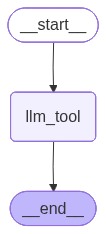

In [19]:
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

builder=StateGraph(State)

## Add nodes
builder.add_node("llm_tool",llm_tool)
builder.add_node("tools",ToolNode(tools))

## Add Edge
builder.add_edge(START,"llm_tool")
builder.add_conditional_edges(
    "llm_tool",
    tools_condition
)
builder.add_edge("tools",END)


graph_builder = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [22]:
## invocation
messages=graph_builder.invoke({"messages":"What is 2 plus 2"})

for message in messages["messages"]:
    message.pretty_print()

================================ Human Message =================================

What is 2 plus 2
================================== Ai Message ==================================
Tool Calls:
  add (8w18rnkxa)
 Call ID: 8w18rnkxa
  Args:
    a: 2
    b: 2
================================= Tool Message =================================
Name: add

4


In [21]:
messages=graph.invoke({"messages":"What Machine Learning"})

for message in messages["messages"]:
    message.pretty_print()

================================ Human Message =================================

What Machine Learning
================================== Ai Message ==================================

Machine Learning (ML) is a subset of **Artificial Intelligence (AI)** that focuses on building systems capable of learning patterns and making decisions from data, without being explicitly programmed for specific tasks. Instead of relying on rigid instructions, ML models improve their performance over time by analyzing examples (data) and adjusting their internal parameters accordingly.

### Key Concepts:
1. **Types of Machine Learning**:
   - **Supervised Learning**: Uses labeled data (input-output pairs) to train models. Examples include predicting house prices (regression) or classifying emails as spam (classification).
   - **Unsupervised Learning**: Finds hidden patterns in unlabeled data, such as grouping customers into segments (clustering).
   - **Reinforcement Learning**: An agent learns by int